In [2]:
import pandas as pd
from matplotlib import pyplot as plt

# Load the simulated data

In [3]:
# m4 = pd.read_excel('sim4_machines.xlsx', sheet_name='order')
# m4.rename(columns={'RR':'RR Order'}, inplace = True)
# m2 = pd.read_excel('low_machines.xlsx', sheet_name='Machines 2')
# m4 = pd.read_excel('low_machines.xlsx', sheet_name='Machines 4')
# m8 = pd.read_excel('low_machines.xlsx', sheet_name='Machines 8')
# m16 = pd.read_excel('high_machines.xlsx', sheet_name='Machines 16')
# m32 = pd.read_excel('high_machines.xlsx', sheet_name='Machines 32')
# m64 = pd.read_excel('high_machines.xlsx', sheet_name='Machines 64')
m2 = pd.read_excel('all_machines.xlsx', sheet_name='Machines 2')
m4 = pd.read_excel('all_machines.xlsx', sheet_name='Machines 4')
m8 = pd.read_excel('all_machines.xlsx', sheet_name='Machines 8')
m16 = pd.read_excel('all_machines.xlsx', sheet_name='Machines 16')
m32 = pd.read_excel('all_machines.xlsx', sheet_name='Machines 32')
m64 = pd.read_excel('all_machines.xlsx', sheet_name='Machines 64')
# m4 = pd.read_excel('multiple_wf.xlsx', sheet_name='Machines 4')
# m8 = pd.read_excel('multiple_wf.xlsx', sheet_name='Machines 8')
# m16 = pd.read_excel('multiple_wf.xlsx', sheet_name='Machines 16')
# m32 = pd.read_excel('multiple_wf.xlsx', sheet_name='Machines 32')
# m4 = pd.read_excel('holes.xlsx', sheet_name='Machines 4')
# m8 = pd.read_excel('holes.xlsx', sheet_name='Machines 8')
# m16 = pd.read_excel('holes.xlsx', sheet_name='Machines 16')
# m32 = pd.read_excel('holes.xlsx', sheet_name='Machines 32')
# m64 = pd.read_excel('holes.xlsx', sheet_name='Machines 64')

In [4]:
def percentage_change(col1, col2):
    return ((col1.sub(col2)).div(col2)).mul(100)

In [5]:
percs = []
# df = df.groupby(['Method Used'])
df = m8
# df = df[df.n == 5]

# for method in ['FST-EFT-EFT\n', 'FR-EFT-EFT\n', 'B-EFT-EFT\n', 'W-EFT-EFT\n']:
#     plt.plot(df[df['Method Used'] == method]['Schedule Len'], label=method)
    # print(df[df['Method Used'] == method]['Schedule Len'])

# print(df[df['Method Used'] == 'FST-EFT-EFT\n'])
for df in [m2, m4, m8]:
    # df['perc_order'] = percentage_change(df['Heft'], df['RR'])    
    sw_df = df[df.fat <= 0.2]
    sw_df = sw_df[sw_df['perc_heft'] >= 10]
    bw_df = df[df.fat > 0.2]
    bw_df = bw_df[bw_df['perc_heft'] >= 10]
    big_percs = df[df['perc_heft'] >= 10]
    print(len(big_percs))
    percs.append(round(len(bw_df) * 100 / len(big_percs), 2))
print(percs)
# print(f"Number of workflows that saw more that 10% improvement: {len(big_percs)}")
# print(f"Workflows with width <= 0.2: {len(sw_df)}")
# print(f"Workflows with width > 0.2: {len(bw_df)}")

KeyError: 'perc_heft'

In [ ]:
plt.figure(figsize=(5, 5))
df = m32
df['perc_idle'] = percentage_change(df['IdleHeft'], df['IdleOrder'])    
gvar = 'n'
# plt.plot(df.groupby([gvar]).mean()['perc_idle'], label='df')
# plt.plot(percs, label='')
# plt.xticks(percs, [0.1, 0.2, 0.4, 0.6])

df.groupby([gvar]).mean()['perc_idle']
# plt.show()

KeyError: 'IdleHeft'

<Figure size 360x360 with 0 Axes>

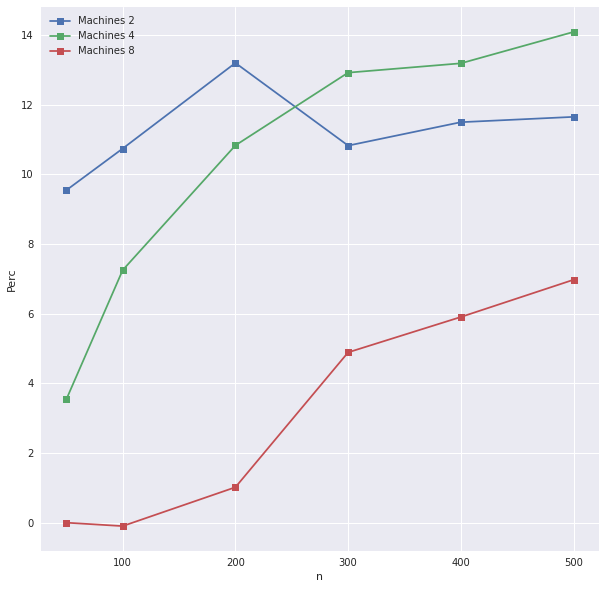

In [16]:
plt.figure(figsize=(10, 10))
plt.style.use("seaborn")
for i, df in enumerate([m2, m4, m8]):
    df.rename(columns={'fat': 'width'}, inplace=True)
    df['perc_heft'] = percentage_change(df['heft'], df['hheft'])    
    df['perc_heft_rr'] = percentage_change(df['heft'], df['rr_random'])    
    df['perc_cpop'] = percentage_change(df['cpop'], df['hheft'])    
    df['perc_cpop_rr'] = percentage_change(df['cpop'], df['rr_random'])    
    # df['perc_cpop'] = percentage_change(df['cpop'], df['hheft'])    
    # df['perc_heft_rr'] = percentage_change(df['heft'], df['rr_random'])    
    # df['perc_cpop_rr'] = percentage_change(df['cpop'], df['rr_random'])    
    # df['perc_hheft']
    gvar = 'n'
    # df = df[df.jump == 4]
    # df = df[df.n > 50]
    # df = df[df.density == 0.8]
    df = df[df.width <= 0.4]
    # df = df[df.regularity == 0.8]
    # plt.plot(df.groupby([gvar]).mean()['perc_heft'], label=f'm{2 ** (i + 1)} heft')
    plt.plot(df.groupby([gvar]).mean()['perc_heft'], label=f'Machines {2 ** (i + 1)}', marker="s")
    # plt.plot(df.groupby([gvar]).mean()['perc_heft_rr'], label=f'm{2 ** (i + 1)} heft')
    # plt.plot(df.groupby([gvar]).mean()['perc_cpop'], label=f'm{2 ** (i + 1)} cpop')
    plt.xlabel(gvar)
    plt.ylabel('Perc')
plt.legend(loc="upper left")
# plt.plot(df.groupby(['n']).mean()['HHeft'], label='HHeft')
# plt.plot(df.groupby(['n']).mean()['Heft'], label='Heft')
# plt.plot(df.groupby(['n']).mean()['RR Order'], label='HHeft')
# plots = plt.plot(df.groupby(['n']).mean()['RR'], color='green')
# plt.show()
